<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



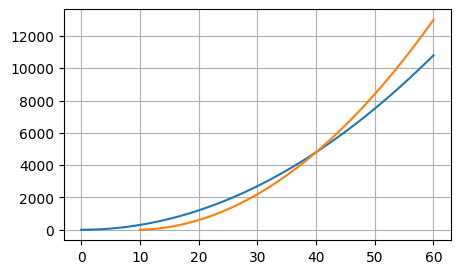

In [50]:
a1 = 6
x1 = lambda t: (1/2)*a1*((t)**2)

a2 = 10
v2 = 10
t0 = 10
x2 = lambda t: v2*(t-t0) + (1/2)*a2*((t-t0)**2)

t1 = np.linspace(0,60,1000)
t2 = np.linspace(10,60,1000)
plt.figure(figsize=(5,3))
plt.plot(t1,x1(t1))
plt.plot(t2,x2(t2))
plt.grid()

__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.


__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

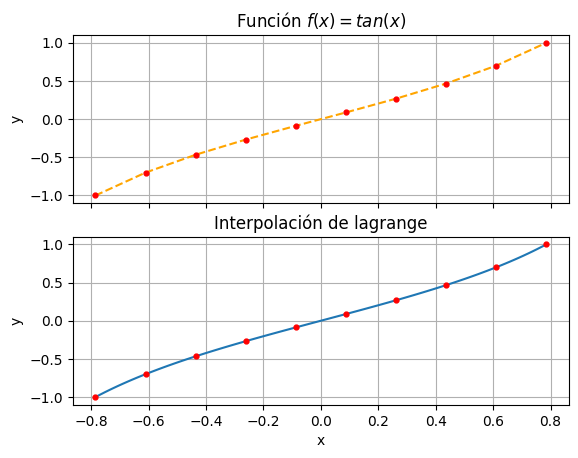

In [27]:
x = np.linspace(-np.pi/4, np.pi/4, 10)
f = lambda x: np.tan(x)
lagrange = sp.interpolate.lagrange(x, f(x))

x_ = np.linspace(np.min(x), np.max(x),100)

l = sp.interpolate.interp1d(x, f(x), kind='linear')


fig, axs = plt.subplots(2)
axs[0].set_title('Función $f(x)=tan(x)$')
axs[0].plot(x,f(x),'--',color='orange')
axs[0].plot(x,f(x),"r.",markersize=(7))
axs[0].grid()

axs[1].set_title('Interpolación de lagrange')
axs[1].plot(x_,lagrange(x_))
axs[1].plot(x,f(x),"r.",markersize=(7))
axs[1].grid()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
for ax in axs.flat:
    ax.label_outer()

In [ ]:
x = pd.DataFrame( np.array([1, 1.3, 1.6, 1.9, 2.2]) )
fx = pd.DataFrame( np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623]) )



__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [52]:
import requests
from PIL import Image
from io import BytesIO

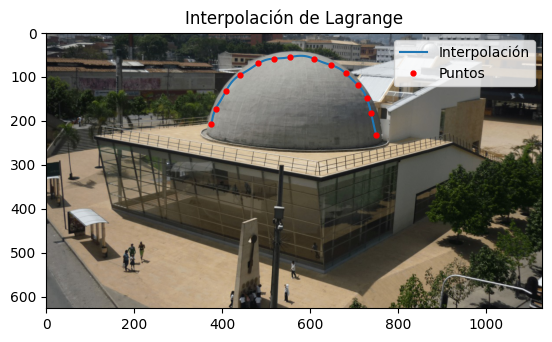

In [84]:
url = 'https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
im = np.array(img)

x = (5.3/2.4)*np.array([170.1, 174.6, 185.2, 199.9, 218.7, 234.7, 251., 275.6, 293.1, 308.7, 321.4, 330.4, 334.9, 340.2])
y = (4.5/2.2)*np.array([101.6,  84.0,  64.4,  46.4,  33.7,  28.4, 26.8,  28.4,  35.4,  44.8,  57.9,  72.6,  89.4, 113.1])
poly = sp.interpolate.lagrange(x,y)
x_=np.linspace(np.min(x), np.max(x),100)
plt.figure()
plt.title('Interpolación de Lagrange')
plt.plot(x_,poly(x_),label='Interpolación')
plt.plot(x,y,'.',markersize=7,color='red',label='Puntos')
plt.legend()
plt.imshow(im);

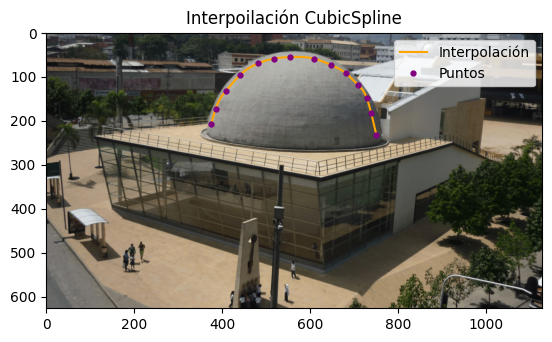

In [83]:
cubic = sp.interpolate.CubicSpline(x, y, axis=0, bc_type='not-a-knot', extrapolate=None)
plt.figure()
plt.title('Interpoilación CubicSpline')
plt.plot(x_,cubic(x_),color='orange', label='Interpolación')
plt.plot(x,y,'.',markersize=7,color='purple', label='Puntos')
plt.legend()
plt.imshow(im)